# Climate Analysis and Exploration

In [1]:
# Dependencies 
import sqlalchemy
from sqlalchemy.ext.automap import automap_base 
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [2]:
# Connect to the sqlite database
engine = create_engine("sqlite:///hawaii.sqlite")

## Explore the Database

In [3]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [4]:
measurement_columns = inspector.get_columns("measurement")
for c in measurement_columns:
    print(c["name"], c["type"])

id INTEGER
station VARCHAR
date VARCHAR
prcp FLOAT
tobs INTEGER


In [5]:
station_columns = inspector.get_columns("station")
for c in station_columns:
    print(c["name"], c["type"])

id INTEGER
station VARCHAR
name VARCHAR
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [6]:
# Reflect the tables into classes 
Base = automap_base()

Base.prepare(engine, reflect=True)

In [7]:
# Save a reference to the classes
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Start a session to query the database
session = Session(bind=engine)

In [9]:
measurement_results = session.query(Measurement.station, Measurement.date, Measurement.prcp, Measurement.tobs).all()
station_results = session.query(Station.station, Station.name, Station.latitude, Station.longitude, Station.elevation).all()

In [10]:
#measurement_results
#station_results

## Precipitation Analysis

In [11]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

In [12]:
# Get the latest date 
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

In [91]:
# Get the last 12 months of precipitation data 
prcp_results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > "2016-08-22").order_by(Measurement.date).all()
date = [result[0] for result in prcp_results]
precipitation = [result[1] for result in prcp_results]

prcp_df = pd.DataFrame({
    "Date": date, 
    "Precipitation": precipitation
}).set_index("Date")
prcp_df.head()

,Precipitation
Date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,0.02
2016-08-23,1.79


In [17]:
prcp_df.plot.bar()

plt.title("Precipitation in the Last 12 Months in Hawaii")
plt.xlabel("Date")
plt.ylabel("Precipitation")
plt.ylim(0, 2.5)
plt.tight_layout()

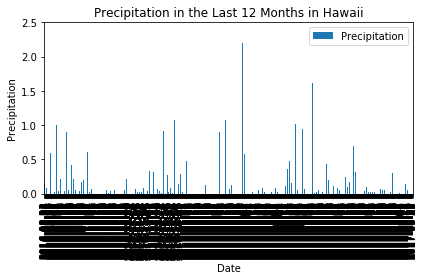

In [18]:
plt.show()

In [19]:
# Summary statistics for the precipitation data 
prcp_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


## Station Analysis

In [20]:
# Calculating the total number of stations
stations_count = session.query(Station).filter(Station.station == Station.station).count()
stations_count

9

In [93]:
# List the stations and observation counts in descending order
# Find the most active station 
obs_results = session.query(Measurement.station, Measurement.tobs).all()
station_name = [result[0] for result in obs_results]
temp_observation = [result[1] for result in obs_results]

temp_observation_df = pd.DataFrame({
    "Station Name": station_name, 
    "Observation Count": temp_observation
})

obs_count = temp_observation_df.groupby("Station Name").count().sort_values("Observation Count", ascending=False)
obs_count

,Observation Count
Station Name,
USC00519281,2772
USC00513117,2696
USC00519397,2685
USC00519523,2572
USC00516128,2484
USC00514830,1937
USC00511918,1932
USC00517948,683
USC00518838,342


In [94]:
# Get the last 12 months of temperature observation data
# Filter by the station with the highest number of observations 
tobs_results = session.query(Measurement.tobs).filter(Measurement.station == "USC00519281").filter(Measurement.date > "2016-08-22").order_by(Measurement.date).all()
tobs = [result[0] for result in tobs_results]

temp_df = pd.DataFrame({
    "Temperature": tobs
})
temp_df.head()

,Temperature
0,77
1,77
2,80
3,80
4,75


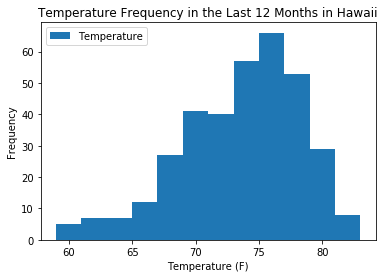

In [83]:
# Plot the histogram to see the temperature frequency
temp_df.plot.hist(bins=12)

plt.title("Temperature Frequency in the Last 12 Months in Hawaii")
plt.xlabel("Temperature (F)")
plt.ylabel("Frequency")
plt.show()

## Temperature Analysis

In [99]:
def calc_temps():
    """Accepts a start and end date in the UTC date format/
    and return the minimum, average, and maximum/
    temperatures for that range of dates."""
    end = datetime.datetime.strptime(Measurement.date, "%Y-%m-%d")
    start = datetime.datetime.strptime(end - dt.timedelta(days=7))
    
    return 
    session.query(func.min(Measurement.tobs)).filter(Measurement.date > start).fliter(Measurement.date < end).all()
    session.query(func.mean(Measurement.tobs)).filter(Measurement.date > start).fliter(Measurement.date < end).all()
    session.query(func.max(Measurement.tobs)).filter(Measurement.date > start).fliter(Measurement.date < end).all()